Looking at orbits using more advanced tools

Following https://towardsdatascience.com/modelling-the-three-body-problem-in-classical-mechanics-using-python-9dc270ad7767


In [4]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.integrate
from matplotlib import animation
%matplotlib inline
from scipy import stats


Testing out `solve_ivp`.

In [139]:
def f(t, x):
    return x

In [147]:
result = scipy.integrate.solve_ivp(f, (1, 10), np.array([1]))
result

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 50
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 1.        ,  1.10001999,  2.06609106,  3.30431769,  4.64528981,
        6.0274784 ,  7.42658963,  8.83271453, 10.        ])
 t_events: None
        y: array([[1.00000000e+00, 1.10519301e+00, 2.90405980e+00, 1.00174032e+01,
        3.82917453e+01, 1.52525445e+02, 6.17906340e+02, 2.52084574e+03,
        8.10017586e+03]])
 y_events: None

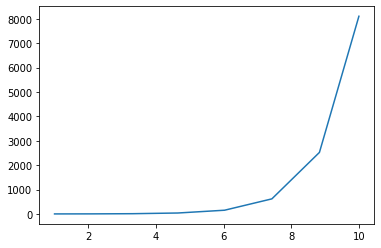

In [150]:
fig, ax = plt.subplots()
ax.plot(result['t'], result['y'][0])

In [19]:
#Define universal gravitation constant
G = 6.67408e-11 #N-m2/kg2

#Reference quantities
m_nd = 1.989e+30 # mass of the sun/kg
r_nd = 1.495978707e+11 # 1 AU/m
t_nd = 365.2425 * 24 * 60 * 60 # year/s 
v_nd = r_nd / t_nd

# Net constants
K1 = G*t_nd*m_nd/(r_nd**2*v_nd)
K2 = v_nd*t_nd/r_nd

In [20]:
m = np.ones(3) * 0.0001

r = np.array([[-0.5, 0, 0],
              [ 0.5, 0, 0],
              [ 0,   1, 0]])

v = np.array([[ 0.01, 0.01, 0],
              [-0.05, 0, 0],
              [ 0,   -0.01, 0]], dtype="float64")



In [133]:
m = np.ones(2) * 0.001

r = np.array([[-1, 0, 0],
              [ 1, 0, 0]])

v = np.array([[ 0.00,  0.2,    0],
              [ 0.00, -0.2,    0]], dtype="float64")


In [134]:
r_com = (r * m[:, None]).sum(axis=0)/m.sum()
v_com = (v * m[:, None]).sum(axis=0)/m.sum()

In [135]:
r_com, v_com

(array([0., 0., 0.]), array([0., 0., 0.]))

In [136]:
def orbit_equations(w, t, G, m):
    ndims = 3
    n = w.shape[0]//2//ndims
    r = w[:ndims*n].reshape((-1, ndims))
    v = w[ndims*n:].reshape((-1, ndims))
    
    diff = r.reshape((-1, 1, ndims)) - r
    dist = np.sqrt((diff**2).sum(axis=2))**3
    
    forces = K1 * (diff / dist[:, :, None])
    forces[np.arange(n), np.arange(n), :] = 0
    #print(forces)
    dvdt = forces.sum(axis=0)
                         
    drdt = K2 * v
    derivs = np.concatenate([drdt, dvdt]).flatten()
    '''
    r1 = w[:3]
    r2 = w[3:6]
    r3 = w[6:9]
    v1 = w[9:12]
    v2 = w[12:15]
    v3 = w[15:18]
    r12 = scipy.linalg.norm(r2-r1)
    r13 = scipy.linalg.norm(r3-r1)
    r23 = scipy.linalg.norm(r3-r2)
    
    dv1bydt = K1*m2*(r2-r1)/r12**3+K1*m3*(r3-r1)/r13**3
    dv2bydt = K1*m1*(r1-r2)/r12**3+K1*m3*(r3-r2)/r23**3
    dv3bydt = K1*m1*(r1-r3)/r13**3+K1*m2*(r2-r3)/r23**3
    dr1bydt = K2*v1
    dr2bydt = K2*v2
    dr3bydt = K2*v3
    r12_derivs = np.concatenate((dr1bydt,dr2bydt))
    r_derivs = np.concatenate((r12_derivs,dr3bydt))
    v12_derivs = np.concatenate((dv1bydt,dv2bydt))
    v_derivs = np.concatenate((v12_derivs,dv3bydt))
    derivs = np.concatenate((r_derivs,v_derivs))'''
    return derivs

In [137]:
init_params

array([-0.5 ,  0.  ,  0.  ,  0.5 ,  0.  ,  0.  ,  0.  ,  0.01,  0.  ,
        0.  , -0.02,  0.  ])

In [138]:
orbit_equations(init_params, 1, G, m)

/Users/jackbennetto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


array([ 0.00000000e+00,  1.00000000e-02,  0.00000000e+00,  0.00000000e+00,
       -2.00000000e-02,  0.00000000e+00,  3.94857193e+01,  0.00000000e+00,
        0.00000000e+00, -3.94857193e+01,  0.00000000e+00,  0.00000000e+00])

In [128]:
#Package initial parameters
init_params = np.concatenate([r, v]).flatten() #Initial parameters
time_span = np.linspace(0, .12, 500) #20 orbital periods and 500 points




#Run the ODE solver
three_body_sol  = scipy.integrate.odeint(orbit_equations,
                                         init_params,
                                         time_span,
                                         args=(G, m))

/Users/jackbennetto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [129]:
r1_sol = three_body_sol[:,:3]
r2_sol = three_body_sol[:,3:6]
#r3_sol = three_body_sol[:,6:9]

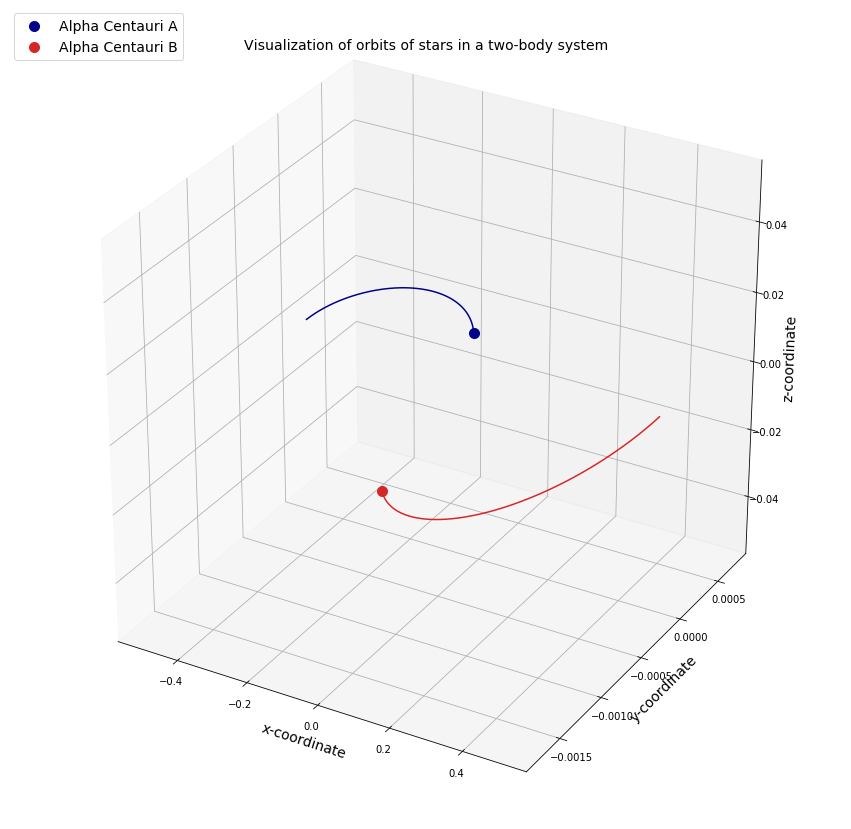

In [130]:
#Create figure
fig = plt.figure(figsize=(15,15))

#Create 3D axes
ax = fig.add_subplot(111,projection="3d")

#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
#ax.plot(r3_sol[:,0],r3_sol[:,1],r3_sol[:,2],color="green")

#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
#ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="green",marker="o",s=100,label="Alpha Centauri B")


#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14);

Okay, now let's play.

To make things easy let's drop to two dimension and stay with three starts, all the same mass. We'll give them normally distributing r and v.

In [76]:
m = np.ones(3, dtype='float64')

r = stats.norm(0, 1).rvs((3, 3))
v = stats.norm(0, .01).rvs((3, 3))




In [77]:
init_params.shape

(12,)

In [79]:
%pdb

Automatic pdb calling has been turned ON


In [80]:
#Package initial parameters
init_params = np.concatenate([r.flatten(), v.flatten()])
time_span = np.linspace(0,200,500) #20 orbital periods and 500 points

#Run the ODE solver
three_body_sol  = scipy.integrate.odeint(three_body_equations,
                                         init_params,
                                         time_span,
                                         args=(G *m))

error: Extra arguments must be in a tuple

> /Users/jackbennetto/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py(245)odeint()
    243                              full_output, rtol, atol, tcrit, h0, hmax, hmin,
    244                              ixpr, mxstep, mxhnil, mxordn, mxords,
--> 245                              int(bool(tfirst)))
    246     if output[-1] < 0:
    247         warning_msg = _msgs[output[-1]] + " Run with full_output = 1 to get quantitative information."

ipdb> u
> <ipython-input-80-90f6b3c5cc4f>(9)<module>()
      5 #Run the ODE solver
      6 three_body_sol  = scipy.integrate.odeint(three_body_equations,
      7                                          init_params,
      8                                          time_span,
----> 9                                          args=(G *m))

ipdb> d
> /Users/jackbennetto/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py(245)odeint()
    243                              full_output, rtol, atol, tcrit, h0, hmax, hmin,
    244  

In [81]:
#Define universal gravitation constant
G = 6.67408e-11 #N-m2/kg2

#Reference quantities
m_nd = 1.989e+30 #kg #mass of the sun
r_nd = 5.326e+12 #m #distance between stars in Alpha Centauri
v_nd = 30000 #m/s #relative velocity of earth around the sun
t_nd = 79.91*365*24*3600*0.51 #s # orbital period of Alpha Centauri

#Net constants
K1 = G*t_nd*m_nd/(r_nd**2*v_nd)
K2 = v_nd*t_nd/r_nd

In [82]:
#Update COM formula
r_com=(m1*r1+m2*r2+m3*r3)/(m1+m2+m3)
#Update velocity of COM formula
v_com=(m1*v1+m2*v2+m3*v3)/(m1+m2+m3)

In [83]:
#Package initial parameters
init_params = np.array([r1,r2,r3,v1,v2,v3]) #Initial parameters
init_params = init_params.flatten() #Flatten to make 1D array
time_span = np.linspace(0,200,500) #20 orbital periods and 500 points

#Run the ODE solver
three_body_sol  = scipy.integrate.odeint(three_body_equations,
                                         init_params,
                                         time_span,
                                         args=(G,m1,m2,m3))

In [84]:
r1_sol = three_body_sol[:,:3]
r2_sol = three_body_sol[:,3:6]
r3_sol = three_body_sol[:,6:9]

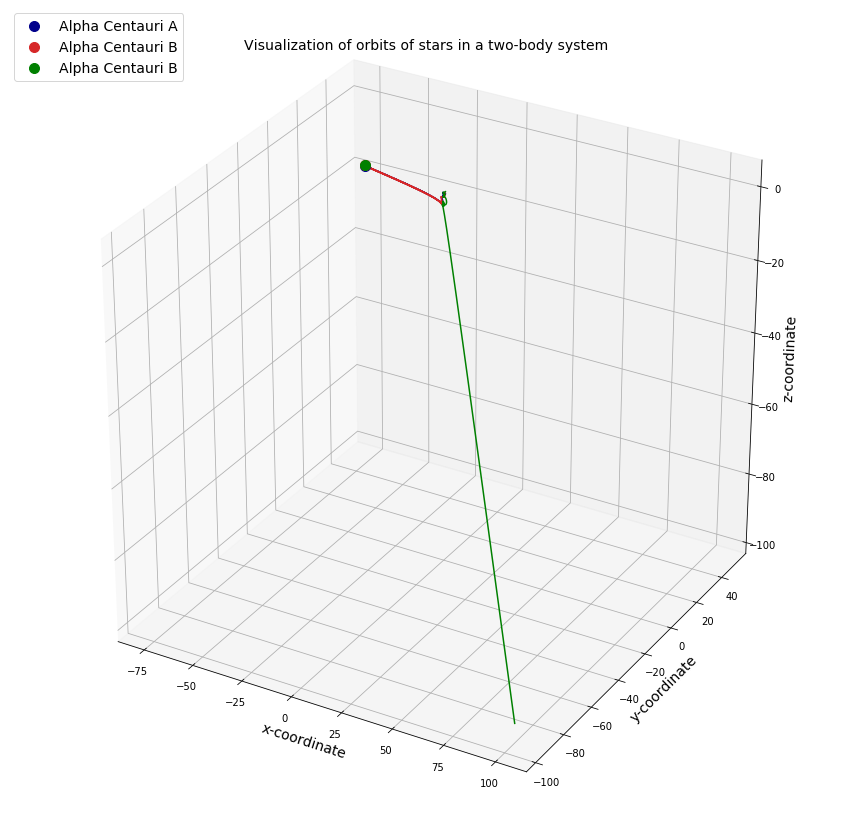

In [86]:
#Create figure
fig = plt.figure(figsize=(15,15))

#Create 3D axes
ax = fig.add_subplot(111,projection="3d")

#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
ax.plot(r3_sol[:,0],r3_sol[:,1],r3_sol[:,2],color="green")

#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="green",marker="o",s=100,label="Alpha Centauri B")


#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14);